<a href="https://colab.research.google.com/github/NeonLabs146/Solar-Wind_OMNI/blob/main/Solar_Wind_parameters_Variations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Solar Wind Statistical Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Read CSV file
csv_file = "/content/Sun_january_OMNI.csv"
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: File '{csv_file}' not found.")
    exit()
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

In [ ]:
# Rename columns to match the data format
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace
df = df.dropna(subset=['HR', 'BZ, nT (GSE)']) #drop NA values rows

print(f"\nOriginal columns: {df.columns.tolist()}")

print("=" * 80)
print("SOLAR WIND PARAMETERS ANALYSIS")
print("=" * 80)
print("\nData Overview:")
print(df)


Original columns: ['YEAR', 'DOY', 'HR', 'BZ, nT (GSE)', 'SW Plasma Temperature, K', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 'Flow pressure', 'Dst-index, nT', 'AE-index, nT']
SOLAR WIND PARAMETERS ANALYSIS

Data Overview:
       YEAR   DOY    HR  BZ, nT (GSE)  SW Plasma Temperature, K  \
0    2025.0   1.0   0.0          -3.4                  178561.0   
1    2025.0   1.0   1.0          -4.9                   98035.0   
2    2025.0   1.0   2.0          -3.7                  130848.0   
3    2025.0   1.0   3.0          -3.7                  140511.0   
4    2025.0   1.0   4.0          -9.0                  131587.0   
..      ...   ...   ...           ...                       ...   
715  2025.0  30.0  19.0           3.3                   41227.0   
716  2025.0  30.0  20.0           0.8                   65485.0   
717  2025.0  30.0  21.0          -9.1                   94966.0   
718  2025.0  30.0  22.0           1.6                   76877.0   
719  2025.0  30.0  23.0    


CROSS-CORRELATION ANALYSIS: BZ vs Other Parameters

Analyzing 720 valid data points...


BZ, nT (GSE) vs SW Proton Density, N/cm^3:
  Valid samples: 720
  Pearson Correlation: 0.9887
  P-value: 0.0000
  Significance: Significant (p<0.05)

BZ, nT (GSE) vs SW Plasma Speed, km/s:
  Valid samples: 720
  Pearson Correlation: 0.9825
  P-value: 0.0000
  Significance: Significant (p<0.05)

BZ, nT (GSE) vs Flow pressure:
  Valid samples: 720
  Pearson Correlation: 0.8859
  P-value: 0.0000
  Significance: Significant (p<0.05)

BZ, nT (GSE) vs Dst-index, nT:
  Valid samples: 720
  Pearson Correlation: 0.0227
  P-value: 0.5427
  Significance: Not significant

BZ, nT (GSE) vs AE-index, nT:
  Valid samples: 720
  Pearson Correlation: -0.0557
  P-value: 0.1355
  Significance: Not significant

✓ Time series plot saved as 'solar_wind_timeseries.png'
✓ Correlation heatmap saved as 'correlation_heatmap.png'
✓ Cross-correlation scatter plots saved as 'bz_crosscorrelation.png'

STATISTICAL SUMMARY

      

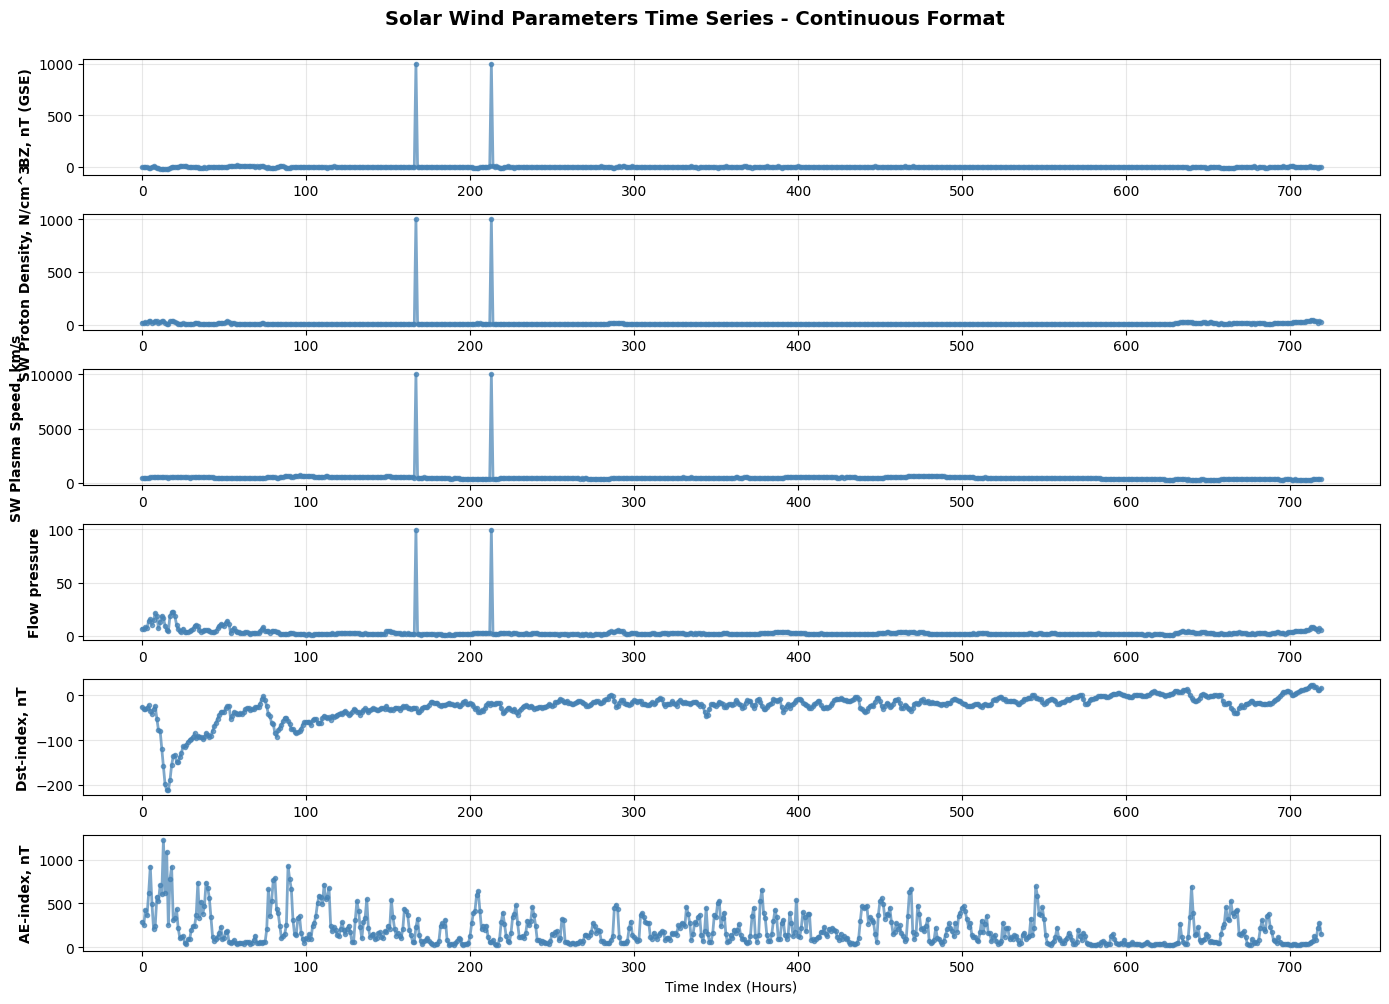

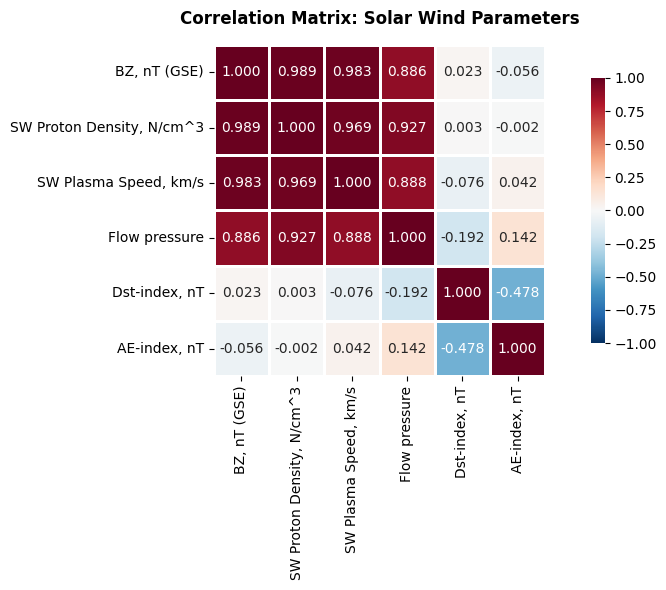

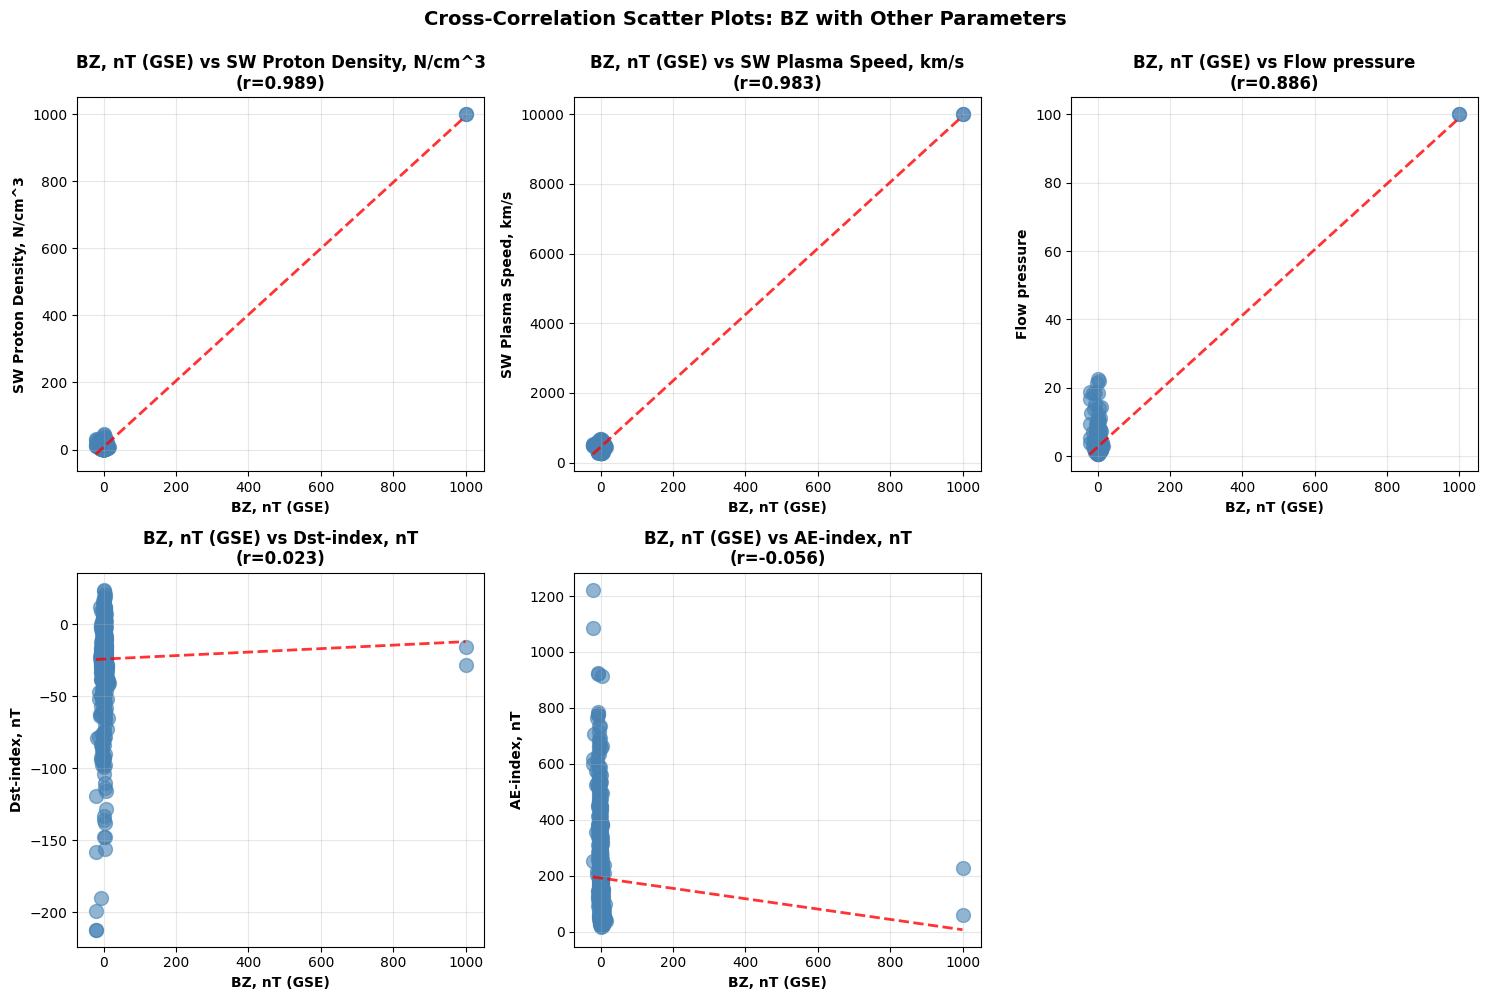

In [ ]:
# Parameters for correlation analysis (excluding temperature)
# Adjust these column names based on your CSV header
parameters = ['BZ, nT (GSE)', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s',
              'Flow pressure', 'Dst-index, nT', 'AE-index, nT']

# 1. CROSS-CORRELATION WITH BZ
print("\n" + "=" * 80)
print("CROSS-CORRELATION ANALYSIS: BZ vs Other Parameters")
print("=" * 80)

bz_col = 'BZ, nT (GSE)'
correlations = {}

print(f"\nAnalyzing {len(df)} valid data points...\n")

for param in parameters:
    if param != bz_col:
        # Remove any remaining NaN in this specific pair
        valid_mask = df[[bz_col, param]].notna().all(axis=1)
        valid_data = df.loc[valid_mask, [bz_col, param]]

        if len(valid_data) > 1:
            corr, p_value = stats.pearsonr(valid_data[bz_col], valid_data[param])
            correlations[param] = {'correlation': corr, 'p_value': p_value}
            print(f"\n{bz_col} vs {param}:")
            print(f"  Valid samples: {len(valid_data)}")
            print(f"  Pearson Correlation: {corr:.4f}")
            print(f"  P-value: {p_value:.4f}")
            print(f"  Significance: {'Significant (p<0.05)' if p_value < 0.05 else 'Not significant'}")
        else:
            print(f"\n{bz_col} vs {param}: Insufficient valid data")

# 2. TIME SERIES VISUALIZATION
fig, axes = plt.subplots(len(parameters), 1, figsize=(14, 10))

# Create a continuous time index
df['time_index'] = range(len(df))

for idx, param in enumerate(parameters):
    axes[idx].plot(df['time_index'], df[param], linewidth=2,
                   color='steelblue', marker='o', markersize=3, alpha=0.7)
    axes[idx].set_ylabel(param, fontsize=10, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlabel('Time Index (Hours)' if idx == len(parameters)-1 else '')

plt.suptitle('Solar Wind Parameters Time Series - Continuous Format',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('solar_wind_timeseries.png', dpi=300, bbox_inches='tight')
print("\n✓ Time series plot saved as 'solar_wind_timeseries.png'")

# 3. CORRELATION HEATMAP (BZ with other parameters)
fig, ax = plt.subplots(figsize=(10, 6))

# Create correlation matrix
corr_matrix = df[parameters].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Correlation Matrix: Solar Wind Parameters',
             fontsize=12, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Correlation heatmap saved as 'correlation_heatmap.png'")

# 4. BZ CROSS-CORRELATION WITH EACH PARAMETER
other_params = [p for p in parameters if p != bz_col]
n_plots = len(other_params)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, param in enumerate(other_params):
    ax = axes[idx]
    ax.scatter(df[bz_col], df[param], s=100, alpha=0.6, color='steelblue')

    # Add regression line
    z = np.polyfit(df[bz_col], df[param], 1)
    p = np.poly1d(z)
    ax.plot(df[bz_col].sort_values(), p(df[bz_col].sort_values()),
            "r--", linewidth=2, alpha=0.8)

    corr = correlations[param]['correlation']
    ax.set_xlabel(bz_col, fontweight='bold')
    ax.set_ylabel(param, fontweight='bold')
    ax.set_title(f'{bz_col} vs {param}\n(r={corr:.3f})', fontweight='bold')
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(other_params), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Cross-Correlation Scatter Plots: BZ with Other Parameters',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('bz_crosscorrelation.png', dpi=300, bbox_inches='tight')
print("✓ Cross-correlation scatter plots saved as 'bz_crosscorrelation.png'")

# 5. STATISTICAL SUMMARY
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
print("\n", df[parameters].describe())

# 6. TIME SERIES STATISTICS
print("\n" + "=" * 80)
print("TIME SERIES VARIATIONS (Hour-to-Hour Changes)")
print("=" * 80)

for param in parameters:
    values = df[param].dropna().values
    if len(values) > 1:
        changes = np.diff(values)
        print(f"\n{param}:")
        print(f"  Range: {values.min():.4f} to {values.max():.4f}")
        print(f"  Mean: {values.mean():.4f}")
        print(f"  Std Dev: {values.std():.4f}")
        print(f"  Median: {np.median(values):.4f}")
        print(f"  Max change: {np.max(np.abs(changes)):.4f}")
        print(f"  Mean change: {np.mean(np.abs(changes)):.4f}")
    else:
        print(f"\n{param}: Insufficient data")

plt.show()

**FULL EDA On Solar wind data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Seaborn theme for all plots
sns.set_theme(style="whitegrid", context="talk", palette="crest")

In [ ]:
# ===========================
# 1. READ CSV FILE
# ===========================
csv_file = input("Enter the CSV file path: ")
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"❌ Error: File '{csv_file}' not found.")
    exit()
except Exception as e:
    print(f"❌ Error reading file: {e}")
    exit()

df.columns = df.columns.str.strip()
print(f"\n✅ Original columns: {df.columns.tolist()}")

Enter the CSV file path: /content/Sun_july_OMNI.csv

✅ Original columns: ['YEAR', 'DOY', 'HR', 'BZ, nT (GSE)', 'SW Plasma Temperature, K', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 'Flow pressure', 'Dst-index, nT', 'AE-index, nT']


In [ ]:
# ===========================
# 2. PARAMETERS
# ===========================
bz_col = 'BZ, nT (GSE)'
parameters = [
    'BZ, nT (GSE)',
    'SW Proton Density, N/cm^3',
    'SW Plasma Speed, km/s',
    'Flow pressure',
    'Dst-index, nT',
    'AE-index, nT'
]

print("\n" + "=" * 90)
print("🌞 SOLAR WIND PARAMETERS ANALYSIS")
print("=" * 90)
print(f"\nTotal rows in file: {len(df)}")


🌞 SOLAR WIND PARAMETERS ANALYSIS

Total rows in file: 744


In [ ]:
# ===========================
# 3. DATA QUALITY CHECK
# ===========================
print("\n" + "=" * 90)
print("🧹 DATA QUALITY CHECK")
print("=" * 90)

missing_before = df.isnull().sum()
print("\nMissing values before cleaning:")
print(missing_before)

# Drop rows with NaN in parameter columns
df_clean = df[parameters].dropna()
rows_removed = len(df) - len(df_clean)

print(f"\nRows with NaN values removed: {rows_removed}")
print(f"Valid data rows: {len(df_clean)}")
print(f"Data coverage: {(len(df_clean)/len(df)*100):.2f}%")

df = df.loc[df_clean.index]
print("\n📋 Data Overview (after cleaning):")
print(df.head(10))


🧹 DATA QUALITY CHECK

Missing values before cleaning:
YEAR                         24
DOY                          24
HR                           24
BZ, nT (GSE)                 24
SW Plasma Temperature, K     24
SW Proton Density, N/cm^3    24
SW Plasma Speed, km/s        24
Flow pressure                24
Dst-index, nT                24
AE-index, nT                 24
dtype: int64

Rows with NaN values removed: 24
Valid data rows: 720
Data coverage: 96.77%

📋 Data Overview (after cleaning):
     YEAR    DOY   HR  BZ, nT (GSE)  SW Plasma Temperature, K  \
0  2025.0  182.0  0.0          -3.3                  202264.0   
1  2025.0  182.0  1.0          -2.5                  241399.0   
2  2025.0  182.0  2.0          -0.1                  292870.0   
3  2025.0  182.0  3.0           0.3                  292678.0   
4  2025.0  182.0  4.0          -0.2                  314548.0   
5  2025.0  182.0  5.0          -0.3                  272504.0   
6  2025.0  182.0  6.0           0.4          

In [ ]:
#============================
#Replacing Outliers with mean values
#============================
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[col].mean()
    df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
print(df.head())


     YEAR    DOY   HR  BZ, nT (GSE)  SW Plasma Temperature, K  \
0  2025.0  182.0  0.0          -3.3                  202264.0   
1  2025.0  182.0  1.0          -2.5                  241399.0   
2  2025.0  182.0  2.0          -0.1                  292870.0   
3  2025.0  182.0  3.0           0.3                  292678.0   
4  2025.0  182.0  4.0          -0.2                  314548.0   

   SW Proton Density, N/cm^3  SW Plasma Speed, km/s  Flow pressure  \
0                        3.9                  494.0           1.86   
1                        4.3                  513.0           2.21   
2                        4.2                  512.0           2.29   
3                        3.6                  523.0           2.05   
4                        3.4                  535.0           1.98   

   Dst-index, nT  AE-index, nT  
0          -17.0         555.0  
1          -14.0         503.0  
2          -12.0         573.0  
3          -15.0         305.0  
4          -10.0       

In [ ]:
# ===========================
# 4. CROSS-CORRELATION WITH BZ (TIME LAG ANALYSIS)
# ===========================
print("\n" + "=" * 80)
print("CROSS-CORRELATION ANALYSIS: BZ vs Other Parameters (with Time Lags)")
print("=" * 80)

bz_col = 'BZ, nT (GSE)'
correlations = {}
max_lag = 50  # Maximum lag in hours
lag_correlations = {param: [] for param in parameters if param != bz_col}
lags = range(-max_lag, max_lag + 1)

print(f"\nAnalyzing {len(df)} valid data points...")
print(f"Computing cross-correlations with time lags from -{max_lag} to +{max_lag} hours\n")

for param in parameters:
    if param != bz_col:
        valid_mask = df[[bz_col, param]].notna().all(axis=1)
        valid_data = df.loc[valid_mask, [bz_col, param]].reset_index(drop=True)

        if len(valid_data) > 1:
            bz_values = valid_data[bz_col].values
            param_values = valid_data[param].values

            # Normalize the data
            bz_norm = (bz_values - np.mean(bz_values)) / np.std(bz_values)
            param_norm = (param_values - np.mean(param_values)) / np.std(param_values)

            # Compute cross-correlation for different lags
            for lag in lags:
                if lag < 0:
                    # Param leads BZ
                    corr = np.corrcoef(bz_norm[-lag:], param_norm[:lag])[0, 1]
                elif lag > 0:
                    # BZ leads param
                    corr = np.corrcoef(bz_norm[:-lag], param_norm[lag:])[0, 1]
                else:
                    # No lag
                    corr = np.corrcoef(bz_norm, param_norm)[0, 1]

                lag_correlations[param].append(corr)

            # Max correlation and corresponding lag
            max_corr_idx = np.nanargmax(np.abs(lag_correlations[param]))
            max_corr = lag_correlations[param][max_corr_idx]
            best_lag = list(lags)[max_corr_idx]

            print(f"\n{bz_col} vs {param}:")
            print(f"  Valid samples: {len(valid_data)}")
            print(f"  Max Correlation: {max_corr:.4f}")
            print(f"  Best Lag: {best_lag} hours")
            if best_lag < 0:
                print(f"  Interpretation: {param} leads {bz_col} by {abs(best_lag)} hours")
            elif best_lag > 0:
                print(f"  Interpretation: {bz_col} leads {param} by {best_lag} hours")
            else:
                print(f"  Interpretation: No significant time lag")
        else:
            print(f"\n{bz_col} vs {param}: Insufficient valid data")


CROSS-CORRELATION ANALYSIS: BZ vs Other Parameters (with Time Lags)

Analyzing 720 valid data points...
Computing cross-correlations with time lags from -50 to +50 hours


BZ, nT (GSE) vs SW Proton Density, N/cm^3:
  Valid samples: 720
  Max Correlation: -0.1629
  Best Lag: -23 hours
  Interpretation: SW Proton Density, N/cm^3 leads BZ, nT (GSE) by 23 hours

BZ, nT (GSE) vs SW Plasma Speed, km/s:
  Valid samples: 720
  Max Correlation: 0.1476
  Best Lag: -50 hours
  Interpretation: SW Plasma Speed, km/s leads BZ, nT (GSE) by 50 hours

BZ, nT (GSE) vs Flow pressure:
  Valid samples: 720
  Max Correlation: -0.0870
  Best Lag: 49 hours
  Interpretation: BZ, nT (GSE) leads Flow pressure by 49 hours

BZ, nT (GSE) vs Dst-index, nT:
  Valid samples: 720
  Max Correlation: 0.3309
  Best Lag: 1 hours
  Interpretation: BZ, nT (GSE) leads Dst-index, nT by 1 hours

BZ, nT (GSE) vs AE-index, nT:
  Valid samples: 720
  Max Correlation: -0.5780
  Best Lag: 1 hours
  Interpretation: BZ, nT (GSE) lead


⏱️ TIME SERIES VISUALIZATION
✓ Time series plot saved as 'solar_wind_timeseries.png'


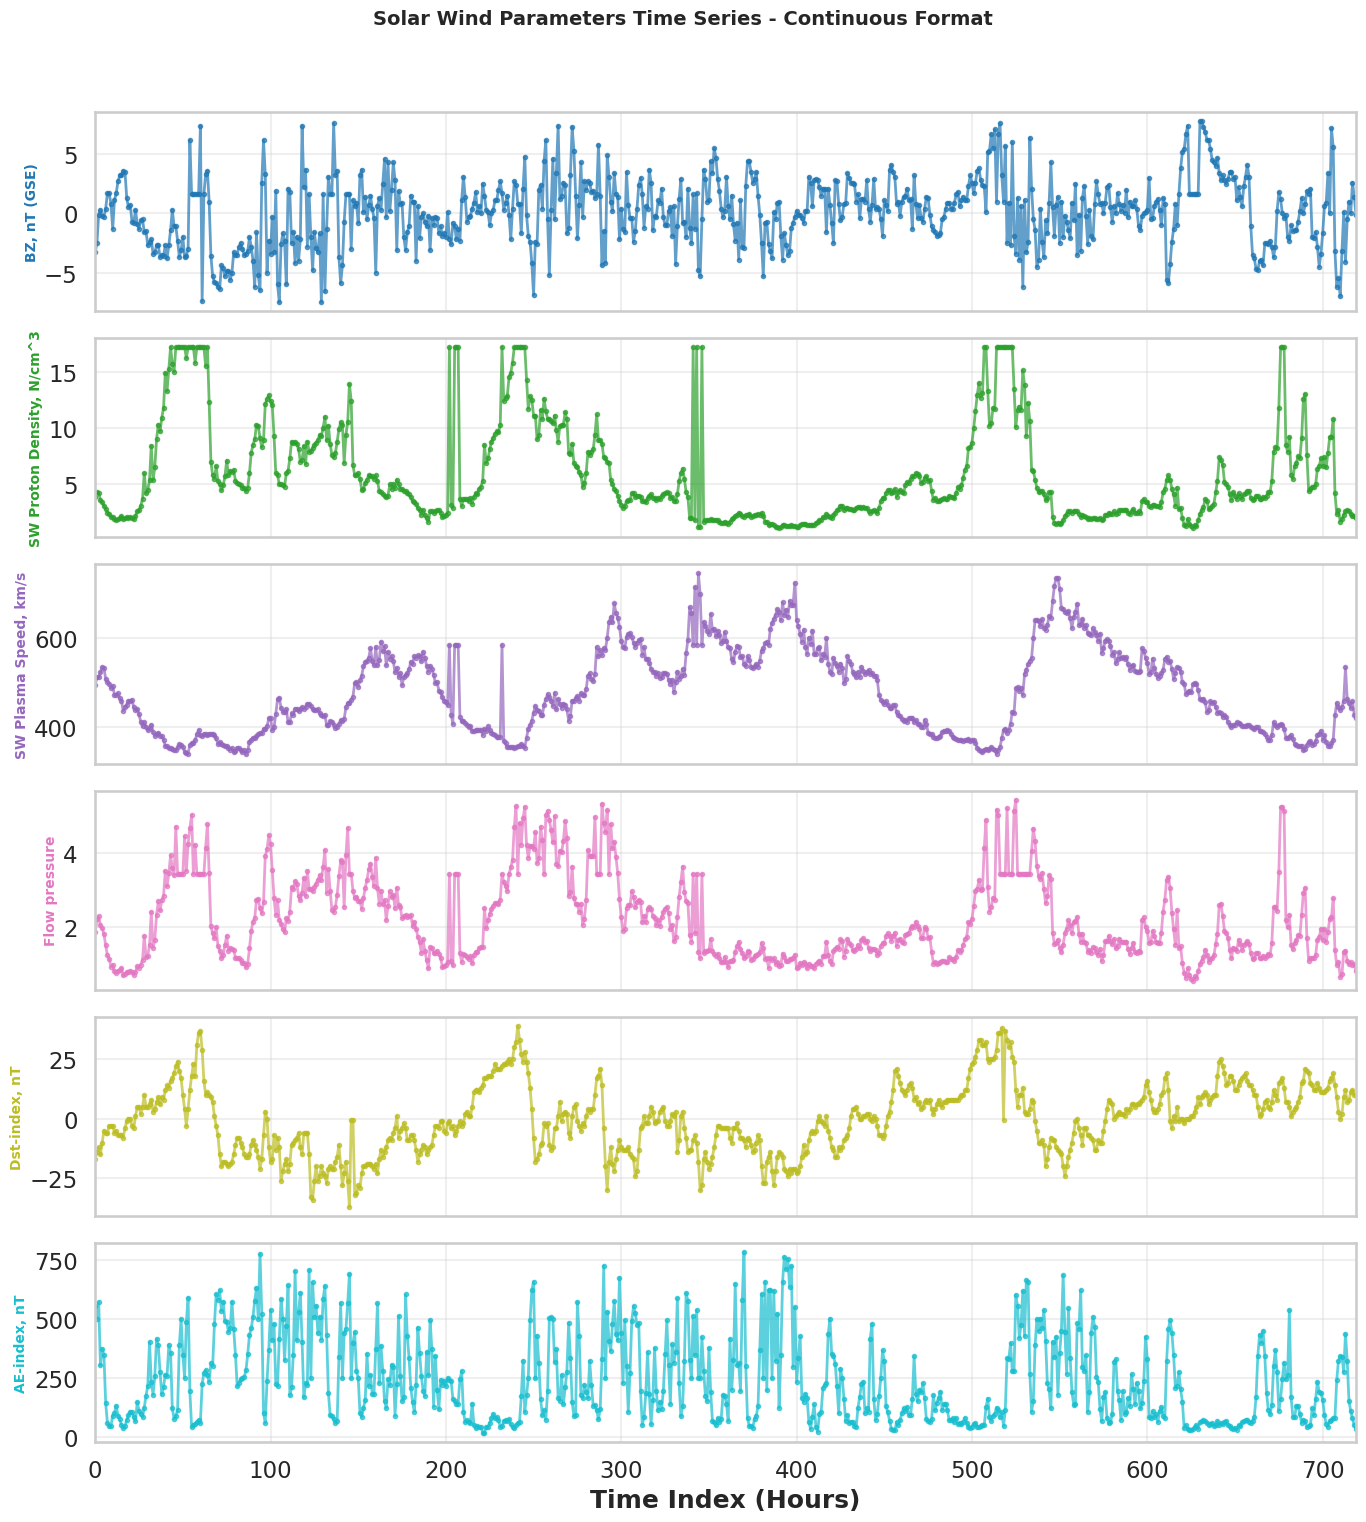

In [ ]:
# ===========================
# 5. TIME SERIES VISUALIZATION
# ===========================
import matplotlib.cm as cm
print("\n" + "=" * 90)
print("⏱️ TIME SERIES VISUALIZATION")
print("=" * 90)

fig, axes = plt.subplots(len(parameters), 1, figsize=(14, 2.5 * len(parameters)), sharex=True)

df['time_index'] = range(len(df))
colors = cm.get_cmap('tab10', len(parameters))

for idx, param in enumerate(parameters):
    axes[idx].plot(df['time_index'], df[param], linewidth=2,
                   color=colors(idx), marker='o', markersize=3, alpha=0.7)
    axes[idx].set_ylabel(param, fontsize=10, fontweight='bold', color=colors(idx))
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(0, len(df['time_index']) - 1)  # ✅ prevents duplicate 0 tick
    if idx == len(parameters) - 1:
        axes[idx].set_xlabel('Time Index (Hours)', fontweight='bold')

plt.suptitle('Solar Wind Parameters Time Series - Continuous Format',
             fontsize=14, fontweight='bold', y=1.02)
plt.margins(x=0)  # ✅ remove padding artifacts
plt.tight_layout()
plt.savefig('solar_wind_timeseries.png', dpi=300, bbox_inches='tight')
print("✓ Time series plot saved as 'solar_wind_timeseries.png'")


✅ Saved: correlation_heatmap.png


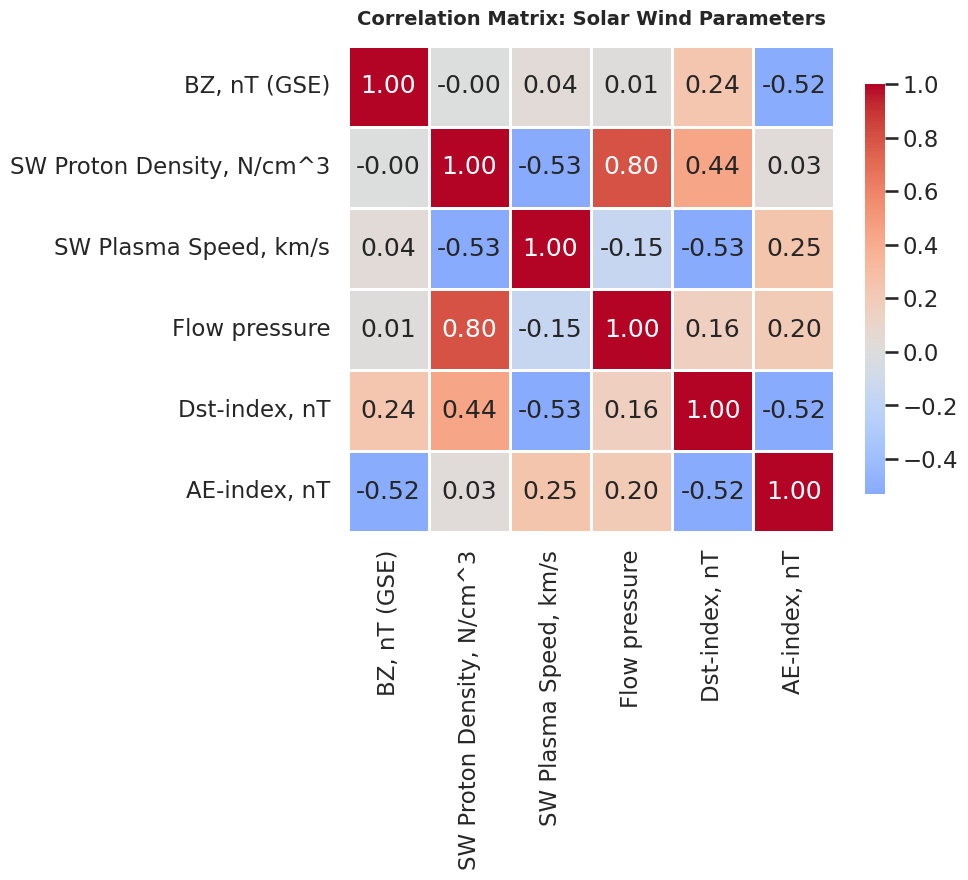

In [ ]:
# ===========================
# 6. CORRELATION HEATMAP
# ===========================
fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = df[parameters].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            cbar_kws={"shrink": 0.6}, square=True, linewidths=1, ax=ax)
ax.set_title('Correlation Matrix: Solar Wind Parameters', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: correlation_heatmap.png")


✓ Smoothed cross-correlation vs time lag plot saved as 'bz_crosscorrelation_timelags.png'


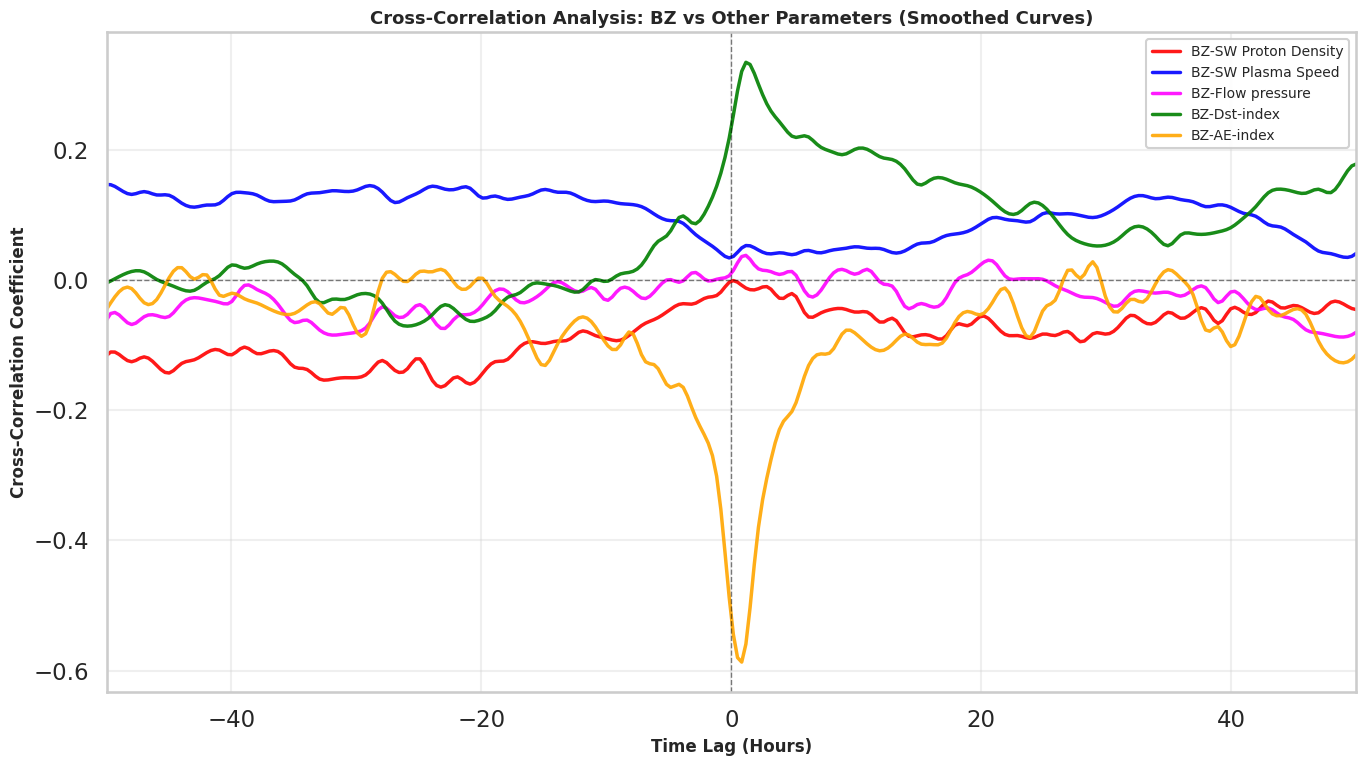

In [ ]:
from scipy.interpolate import make_interp_spline

# ===========================
# 7. CROSS-CORRELATION CURVES
# ===========================
other_params = [p for p in parameters if p != bz_col]

fig, ax = plt.subplots(figsize=(14, 8))

colors = ['red', 'blue', 'magenta', 'green', 'orange', 'purple']
lags_list = np.array(lags)

for idx, param in enumerate(other_params):
    if param in lag_correlations:
        corr_values = np.array(lag_correlations[param])

        # ✅ Smooth the curve using cubic spline interpolation
        if len(lags_list) > 3:  # Need at least 4 points for cubic spline
            x_smooth = np.linspace(lags_list.min(), lags_list.max(), 300)
            spline = make_interp_spline(lags_list, corr_values, k=3)
            y_smooth = spline(x_smooth)
            ax.plot(
                x_smooth,
                y_smooth,
                linewidth=2.5,
                label=f'BZ-{param.split(",")[0]}',
                color=colors[idx % len(colors)],
                alpha=0.9
            )
        else:
            # Fallback for small data
            ax.plot(
                lags_list,
                corr_values,
                linewidth=2.5,
                label=f'BZ-{param.split(",")[0]}',
                color=colors[idx % len(colors)],
                alpha=0.9
            )

# Axis formatting
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5)
ax.set_xlabel('Time Lag (Hours)', fontweight='bold', fontsize=12)
ax.set_ylabel('Cross-Correlation Coefficient', fontweight='bold', fontsize=12)
ax.set_title('Cross-Correlation Analysis: BZ vs Other Parameters (Smoothed Curves)',
             fontweight='bold', fontsize=13)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10, loc='best', framealpha=0.9)
ax.set_xlim([-max_lag, max_lag])

plt.tight_layout()
plt.savefig('bz_crosscorrelation_timelags.png', dpi=300, bbox_inches='tight')
print("\n✓ Smoothed cross-correlation vs time lag plot saved as 'bz_crosscorrelation_timelags.png'")

✓ Maximum correlation bar chart saved as 'bz_max_correlation_bar.png'


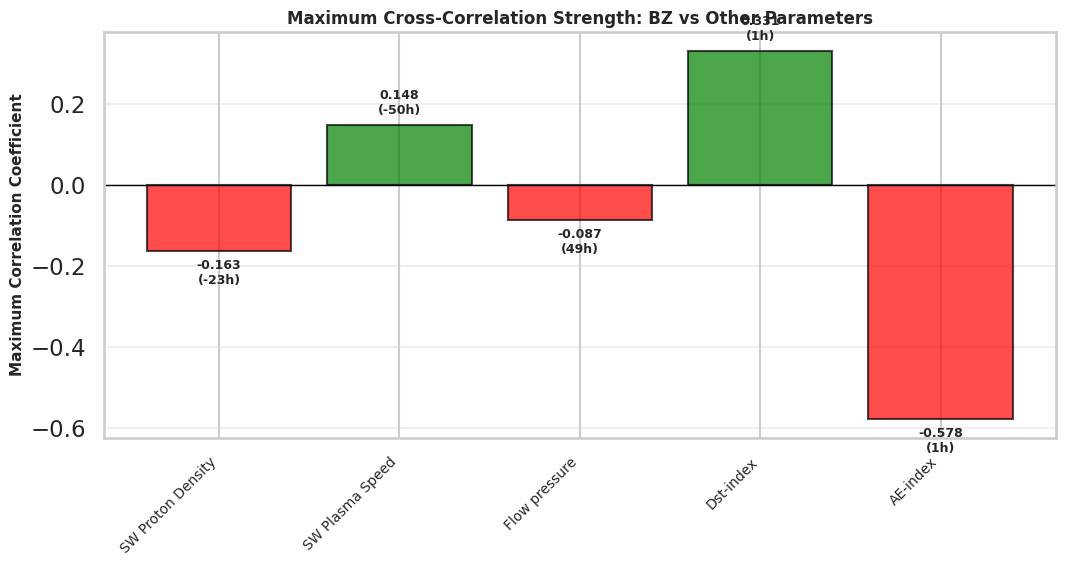

In [ ]:
# 8. MAXIMUM CORRELATION vs PARAMETERS (bar chart)
fig, ax = plt.subplots(figsize=(11, 6))

max_corrs = []
best_lags = []
param_names = []

for param in other_params:
    if param in lag_correlations:
        max_corr_idx = np.nanargmax(np.abs(lag_correlations[param]))
        max_corr = lag_correlations[param][max_corr_idx]
        best_lag = list(lags)[max_corr_idx]

        max_corrs.append(max_corr)
        best_lags.append(best_lag)
        param_names.append(param.split(',')[0])

colors_bars = ['green' if c > 0 else 'red' for c in max_corrs]

bars = ax.bar(range(len(other_params)), max_corrs, color=colors_bars, alpha=0.7,
              edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(other_params)))
ax.set_xticklabels(param_names, fontsize=10, rotation=45, ha='right')
ax.set_ylabel('Maximum Correlation Coefficient', fontweight='bold', fontsize=11)
ax.set_title('Maximum Cross-Correlation Strength: BZ vs Other Parameters',
             fontweight='bold', fontsize=12)
ax.axhline(y=0, color='black', linewidth=1)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels and lag info on bars
for idx, (bar, val, lag) in enumerate(zip(bars, max_corrs, best_lags)):
    ax.text(idx, val + 0.02 if val > 0 else val - 0.02, f'{val:.3f}\n({lag}h)',
            ha='center', va='bottom' if val > 0 else 'top', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('bz_max_correlation_bar.png', dpi=300, bbox_inches='tight')
print("✓ Maximum correlation bar chart saved as 'bz_max_correlation_bar.png'")

In [ ]:

# ===========================
# 9. STATISTICAL SUMMARY
# ===========================
print("\n" + "=" * 90)
print("📊 STATISTICAL SUMMARY")
print("=" * 90)
print(df[parameters].describe())

# ===========================
# 10. TIME SERIES VARIATIONS
# ===========================
print("\n" + "=" * 90)
print("⏱️ TIME SERIES VARIATIONS (Hour-to-Hour Changes)")
print("=" * 90)

for param in parameters:
    values = df[param].dropna().values
    if len(values) > 1:
        changes = np.diff(values)
        print(f"\n{param}:")
        print(f"  Range: {values.min():.2f} to {values.max():.2f}")
        print(f"  Mean ± Std: {values.mean():.2f} ± {values.std():.2f}")
        print(f"  Median: {np.median(values):.2f}")
        print(f"  Max change: {np.max(np.abs(changes)):.2f}")
        print(f"  Mean change: {np.mean(np.abs(changes)):.2f}")
    else:
        print(f"\n{param}: Insufficient data")

print("\n" + "=" * 90)
print("✅ ANALYSIS COMPLETE!")

plt.show()



📊 STATISTICAL SUMMARY
       BZ, nT (GSE)  SW Proton Density, N/cm^3  SW Plasma Speed, km/s  \
count    720.000000                 720.000000             720.000000   
mean       0.142218                   5.923597             480.284846   
std        2.818202                   4.389331              93.993300   
min       -7.500000                   1.100000             339.000000   
25%       -1.700000                   2.600000             397.000000   
50%        0.350000                   4.300000             463.000000   
75%        1.700000                   8.100000             552.250000   
max        7.800000                  17.163611             745.000000   

       Flow pressure  Dst-index, nT  AE-index, nT  
count     720.000000     720.000000    720.000000  
mean        2.196294      -0.333669    240.486535  
std         1.107453      14.088897    179.391520  
min         0.560000     -37.000000     18.000000  
25%         1.310000     -11.000000     86.000000  
50%    

##**Solar Wind ML Prediction Model**

1. **Gradient Boosting Regressor (Usually Best)**

* Excellent for time series with complex non-linear relationships
* Handles temporal dependencies well
* Sequential nature matches solar wind dynamics


2. **Random Forest Regressor**

* Good for capturing variable interactions
* Robust with less hyperparameter tuning needed
* Provides feature importance insights

3. **Linear Regression**

* Baseline comparison model
* Fast and interpretable

**Key Features:**

📊 Time Series Engineering:

* Creates lagged features (3 time steps) capturing temporal dependencies
* Prevents data leakage with temporal train-test split (80-20)

📈 **Model Evaluation:**

* R² score, RMSE, and MAE metrics
* Comparison across all 3 models
* Identifies best performing model automatically

📉 **Visualizations:**

* Feature importance ranking
* Actual vs Predicted scatter plots
* Residuals analysis (to check model quality)
* Time series predictions overlay

🎯 **Interpretability:**

* Top 10 important features displayed
* Easy to understand which parameters influence BZ prediction most

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read CSV file
csv_file = input("Enter the CSV file path: ")
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: File '{csv_file}' not found.")
    exit()
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

Enter the CSV file path: /content/Sun_january_OMNI.csv


In [ ]:
df.columns = df.columns.str.strip()
print(f"Original columns: {df.columns.tolist()}")

Original columns: ['YEAR', 'DOY', 'HR', 'BZ, nT (GSE)', 'SW Plasma Temperature, K', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 'Flow pressure', 'Dst-index, nT', 'AE-index, nT']


In [ ]:
# Define parameters
bz_col = 'BZ, nT (GSE)'
parameters = ['BZ, nT (GSE)', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s',
              'Flow pressure', 'Dst-index, nT', 'AE-index, nT']

print("\n" + "=" * 80)
print("SOLAR WIND TIME SERIES PREDICTION MODEL")
print("=" * 80)

# DATA PREPARATION
print("\nPreparing data...")
df_clean = df[parameters].dropna()
rows_removed = len(df) - len(df_clean)
print(f"Valid data rows: {len(df_clean)}")
print(f"Rows removed (NaN): {rows_removed}")


SOLAR WIND TIME SERIES PREDICTION MODEL

Preparing data...
Valid data rows: 720
Rows removed (NaN): 24


In [ ]:
# Create lagged features (previous time steps)
def create_lagged_features(data, target_col, lag_steps=3):
    """Create lagged features for time series prediction"""
    X = []
    y = []

    for col in data.columns:
        for lag in range(1, lag_steps + 1):
            data[f'{col}_lag{lag}'] = data[col].shift(lag)

    # Remove rows with NaN from lagging
    data_features = data.dropna()

    feature_cols = [col for col in data_features.columns if 'lag' in col or col != target_col]
    X = data_features[feature_cols]
    y = data_features[target_col]

    return X, y, feature_cols

In [ ]:
print("\nCreating lagged features (lag_steps=3)...")
X, y, feature_cols = create_lagged_features(df_clean.copy(), bz_col, lag_steps=3)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_cols)}")


Creating lagged features (lag_steps=3)...
Features shape: (717, 23)
Target shape: (717,)
Number of features: 23


In [ ]:
# FEATURE SCALING
print("\nScaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols, index=X.index)

# TRAIN-TEST SPLIT (80-20, temporal split to avoid data leakage)
split_idx = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Scaling features...

Train set: 573 samples
Test set: 144 samples


In [ ]:
# MODEL TRAINING
print("\n" + "=" * 80)
print("TRAINING MACHINE LEARNING MODELS")
print("=" * 80)

models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                                              max_depth=5, random_state=42, verbose=0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=200, max_depth=15,
                                                     random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression()
}

results = {}
predictions_all = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    results[model_name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'model': model
    }

    predictions_all[model_name] = {'train': y_pred_train, 'test': y_pred_test}

    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test MAE: {test_mae:.4f}")


TRAINING MACHINE LEARNING MODELS

Training Gradient Boosting Regressor...
  Train R²: 1.0000
  Test R²: -0.4122
  Test RMSE: 3.7712
  Test MAE: 2.9412

Training Random Forest Regressor...
  Train R²: 0.9726
  Test R²: 0.3030
  Test RMSE: 2.6494
  Test MAE: 2.1144

Training Linear Regression...
  Train R²: 0.9979
  Test R²: -0.6290
  Test RMSE: 4.0504
  Test MAE: 2.7254


In [ ]:
# IDENTIFYING BEST MODEL
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]['model']

print("\n" + "=" * 80)
print(f"BEST MODEL: {best_model_name}")
print("=" * 80)
print(f"Test R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"Test MAE: {results[best_model_name]['test_mae']:.4f}")


BEST MODEL: Random Forest Regressor
Test R² Score: 0.3030
Test RMSE: 2.6494
Test MAE: 2.1144



Top 10 Important Features:
  Flow pressure: 0.3512
  SW Plasma Speed, km/s: 0.2607
  SW Proton Density, N/cm^3: 0.2262
  BZ, nT (GSE)_lag1: 0.0816
  AE-index, nT: 0.0190
  BZ, nT (GSE)_lag2: 0.0107
  AE-index, nT_lag1: 0.0063
  Flow pressure_lag3: 0.0063
  Flow pressure_lag1: 0.0042
  BZ, nT (GSE)_lag3: 0.0040

✓ Feature importance plot saved as 'feature_importance.png'


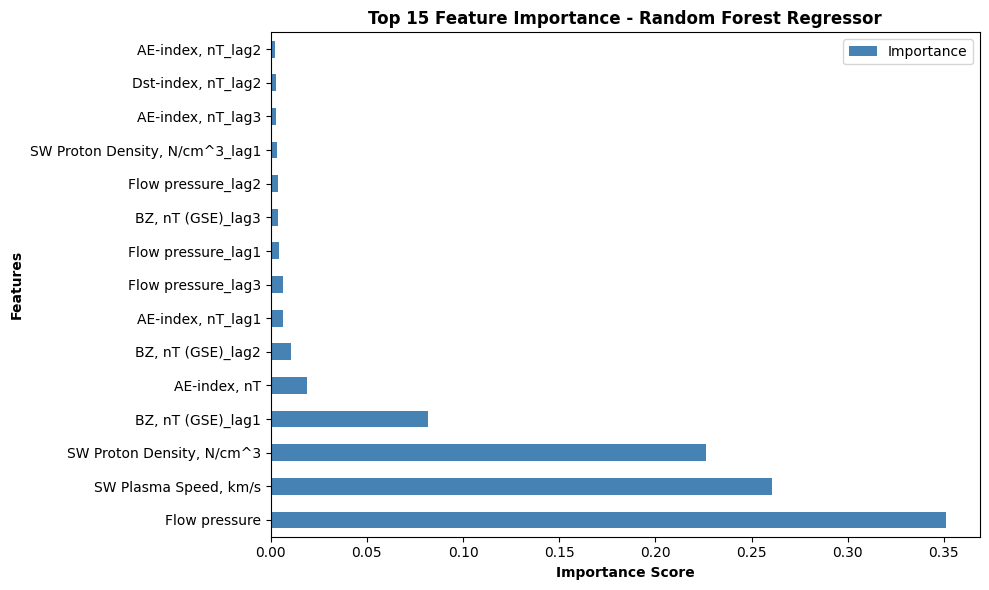

In [ ]:
# FEATURE IMPORTANCE (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print(f"\nTop 10 Important Features:")
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    for idx, row in feature_importance.head(10).iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.4f}")

    # Plot feature importance
    fig, ax = plt.subplots(figsize=(10, 6))
    feature_importance.head(15).plot(x='Feature', y='Importance', kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Importance Score', fontweight='bold')
    ax.set_ylabel('Features', fontweight='bold')
    ax.set_title(f'Top 15 Feature Importance - {best_model_name}', fontweight='bold')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Feature importance plot saved as 'feature_importance.png'")

In [ ]:
# MODEL COMPARISON
print("\n" + "=" * 80)
print("MODEL COMPARISON")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))


MODEL COMPARISON

                       Model  Train R²   Test R²  Test RMSE  Test MAE
Gradient Boosting Regressor  0.999981 -0.412202   3.771232  2.941216
    Random Forest Regressor  0.972553  0.303034   2.649357  2.114362
          Linear Regression  0.997859 -0.628996   4.050372  2.725399


✓ Predictions comparison plot saved as 'predictions_comparison.png'


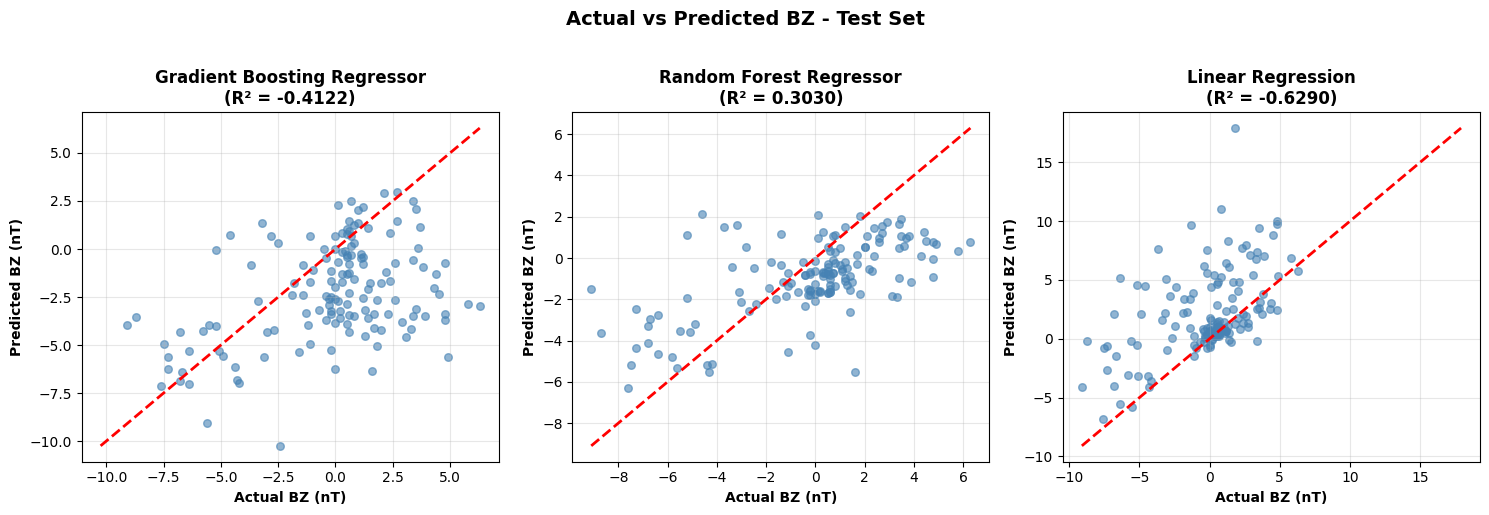

In [ ]:
# VISUALIZATION: Predictions vs Actual
fig, axes = plt.subplots(1, len(results), figsize=(15, 5))

for idx, (model_name, model_results) in enumerate(results.items()):
    ax = axes[idx] if len(results) > 1 else axes
    y_pred = predictions_all[model_name]['test']

    ax.scatter(y_test, y_pred, alpha=0.6, s=30, color='steelblue')

    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    r2 = results[model_name]['test_r2']
    ax.set_xlabel('Actual BZ (nT)', fontweight='bold')
    ax.set_ylabel('Predicted BZ (nT)', fontweight='bold')
    ax.set_title(f'{model_name}\n(R² = {r2:.4f})', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Actual vs Predicted BZ - Test Set', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('predictions_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Predictions comparison plot saved as 'predictions_comparison.png'")

✓ Residuals analysis plot saved as 'residuals_analysis.png'


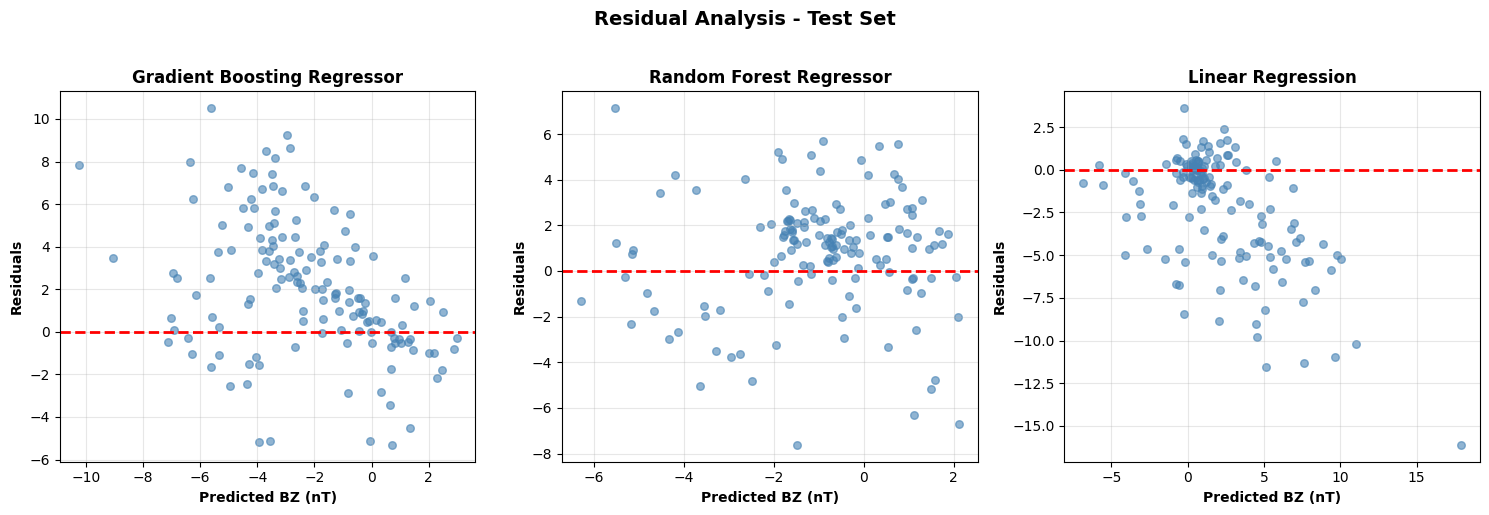

In [ ]:
# RESIDUALS ANALYSIS
fig, axes = plt.subplots(1, len(results), figsize=(15, 5))

for idx, (model_name, model_results) in enumerate(results.items()):
    ax = axes[idx] if len(results) > 1 else axes
    y_pred = predictions_all[model_name]['test']
    residuals = y_test - y_pred

    ax.scatter(y_pred, residuals, alpha=0.6, s=30, color='steelblue')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)

    ax.set_xlabel('Predicted BZ (nT)', fontweight='bold')
    ax.set_ylabel('Residuals', fontweight='bold')
    ax.set_title(f'{model_name}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Residual Analysis - Test Set', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Residuals analysis plot saved as 'residuals_analysis.png'")

✓ Time series predictions plot saved as 'timeseries_predictions.png'

ANALYSIS COMPLETE!

Generated files:
  - feature_importance.png
  - predictions_comparison.png
  - residuals_analysis.png
  - timeseries_predictions.png


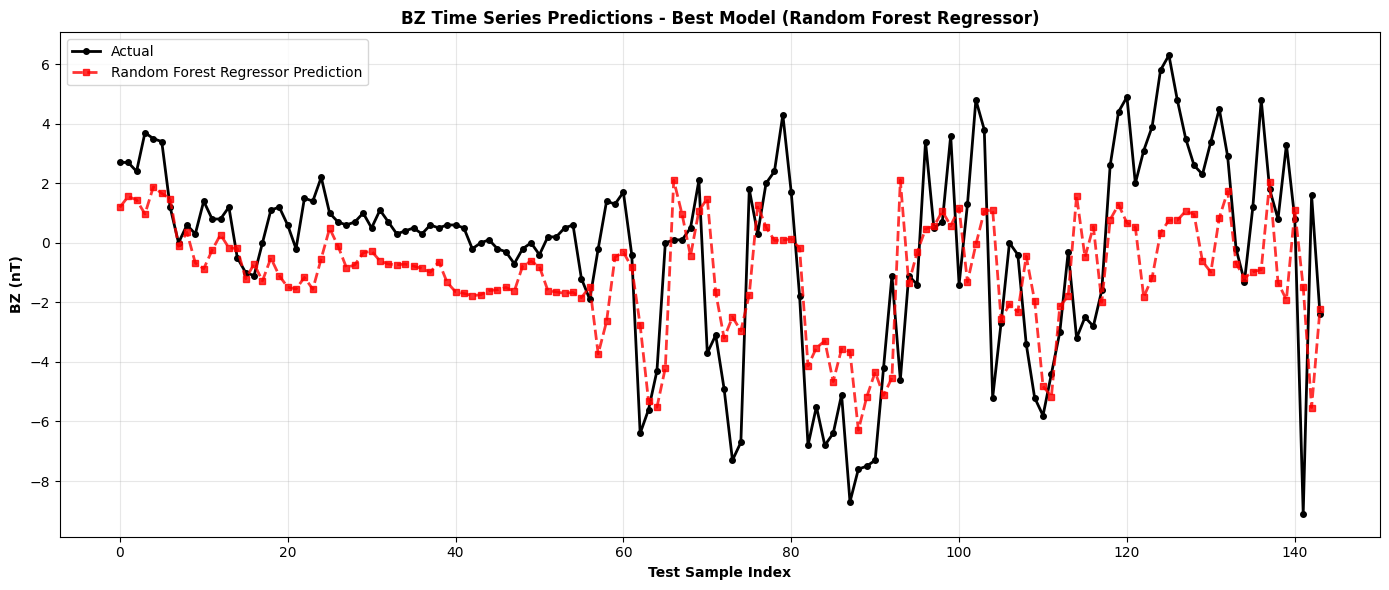

In [ ]:
# TIME SERIES PREDICTIONS
fig, ax = plt.subplots(figsize=(14, 6))

# Plot actual values
ax.plot(range(len(y_test)), y_test.values, 'o-', linewidth=2, label='Actual', color='black', markersize=4)

# Plot predictions from best model
y_pred_best = predictions_all[best_model_name]['test']
ax.plot(range(len(y_test)), y_pred_best, 's--', linewidth=2, label=f'{best_model_name} Prediction',
        color='red', markersize=4, alpha=0.8)

ax.set_xlabel('Test Sample Index', fontweight='bold')
ax.set_ylabel('BZ (nT)', fontweight='bold')
ax.set_title(f'BZ Time Series Predictions - Best Model ({best_model_name})', fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('timeseries_predictions.png', dpi=300, bbox_inches='tight')
print("✓ Time series predictions plot saved as 'timeseries_predictions.png'")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nGenerated files:")
print("  - feature_importance.png")
print("  - predictions_comparison.png")
print("  - residuals_analysis.png")
print("  - timeseries_predictions.png")

plt.show()